In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
# setting some parameters for plots
plt.style.use('seaborn')
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title 
plt.rcParams['figure.figsize'] = 10 , 6 # default figure size

# Positive autoregulation

**Implement code to reproduce Figures 5.4, 5.5 and 5.7 from Alon's book (2nd Edition). A copy of the relevant book pages is available on Mitt.**

In [3]:
def hillfuncact(X,K,n): # Hill function for activator
    return (X**n)/((K**n)+(X**n))

def reghill(X,t,B,Bx,a,K,n,D):
    return (B*hillfuncact(X,K,n)-(a*X))+Bx

In [4]:
t = np.linspace(0,10,50) # time scale
B = 1
Bx = 0.1
ax = 1
K = 0.5
n = 5
D = [1,8]
xst = fsolve(reghill,[0.1,0.5,0.9] ,args=(0,B,Bx,ax,K,n,D))

In [5]:
Xauto = odeint(reghill,0,t,args=(B,Bx,ax,K,n,D))
X1 = odeint(reghill,xst[2]+0.3,t,args=(B,Bx,ax,K,n,D))
X2 = odeint(reghill,xst[2]-0.3,t,args=(B,Bx,ax,K,n,D))
X3 = odeint(reghill,xst[1]+0.05,t,args=(B,Bx,ax,K,n,D))
X4 = odeint(reghill,xst[1]-0.05,t,args=(B,Bx,ax,K,n,D))
X5 = odeint(reghill,xst[0]+0.1,t,args=(B,Bx,ax,K,n,D))
X6 = odeint(reghill,xst[0]-0.1,t,args=(B,Bx,ax,K,n,D))

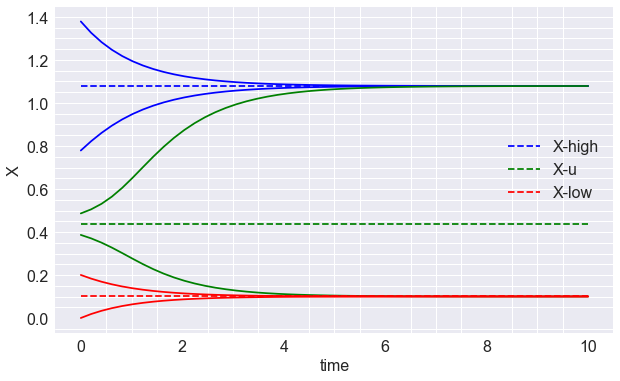

In [6]:
fig, ax1 = plt.subplots()
#ax1.plot(t,Xauto,'b')

ax1.plot(t,X1,'b')
ax1.plot(t,X2,'b')
ax1.plot(t,np.repeat(xst[2],len(t)),'b--',label='X-high')

ax1.plot(t,X3,'g')
ax1.plot(t,X4,'g')
ax1.plot(t,np.repeat(xst[1],len(t)),'g--',label='X-u')

ax1.plot(t,X5,'r')
ax1.plot(t,X6,'r')
ax1.plot(t,np.repeat(xst[0],len(t)),'r--',label='X-low')

ax1.grid(which='both')
ax1.minorticks_on()
ax1.set_xlabel('time')
ax1.set_ylabel('X')
ax1.legend(loc='best')

Text(0,0.5,'Rate Function')

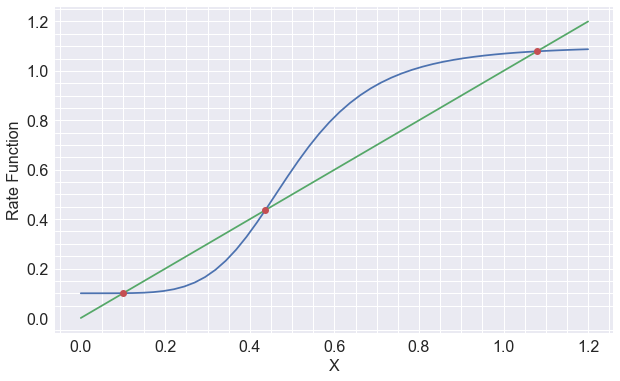

In [7]:
xvals = np.linspace(0,1.2,50)
fig, ax2 = plt.subplots()
ax2.plot(xvals,(hillfuncact(xvals,K,n)*1)+0.1)
ax2.plot(xvals,1*xvals)
ax2.plot(xst,(hillfuncact(xst,K,n)*1)+0.1,'o')
ax2.grid(which='both')
ax2.minorticks_on()
ax2.set_xlabel('X')
ax2.set_ylabel('Rate Function')

In [8]:
def reghill2(X,t,xst,Bx,a,K,n,D): # rate function with pulse
    if (t<D[0]):
        B = xst[0]
        #Bx = xst[0]
    elif (t>=D[0]) & (t<=D[1]):
        B = (xst[2]*a)+0.1
    else:
        B = (xst[2]*a)
    #print(B)
    return (B*hillfuncact(X,K,n)-(a*X))+Bx

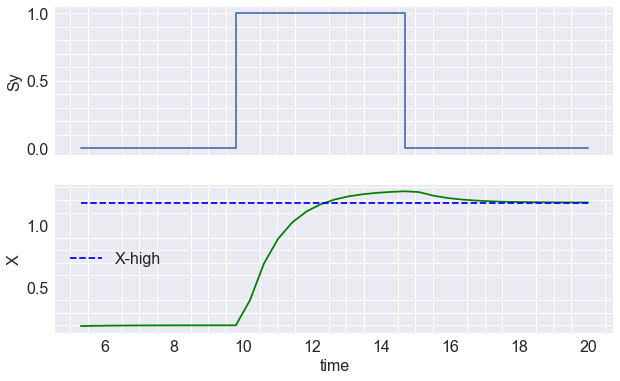

In [9]:
D = [10,15]
t = np.linspace(0,20,50)
s = ((t>D[0])&(t<D[1]))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.step(t[t>5],s[t>5])
ax1.grid(which='both')
ax1.minorticks_on()
#ax1.set_xlabel('time')
ax1.set_ylabel('Sy')

Xauto = odeint(reghill2,0,t,args=(xst,Bx,ax,0.1,20,D))
ax2.plot(t[t>5],Xauto[t>5],'g')
ax2.plot(t[t>5],np.repeat(xst[2]+Bx,len(t[t>5])),'b--',label='X-high')
ax2.grid(which='both')
ax2.minorticks_on()
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax2.legend(loc='center left')

# The toggle switch

**Implement code to reproduce Figures 5.9 and 5.10 from Alon's book (2nd Edition). A copy of the relevant book pages is available on Mitt.**

In [10]:
def hillfuncrep(X,K,n): # Hill function for repressor
    return (1)/(1+((X/K)**n))

def reghillx(X,t,Y,B,a,K,n):
    dxdt = (B*hillfuncrep(Y,K,n))-(a*X)
    return dxdt

In [11]:
t = np.linspace(0,50,100) # time scale
B = 1
a = 1
K = 0.5
n = 10

In [12]:
def rate_XY(u,t,B,a,K,n):
    x,y = u
    dxdt = reghillx(x,t,y,B,a,K,n)
    dydt = reghillx(y,t,x,B,a,K,n)
    return [dxdt,dydt]

In [13]:
U = odeint(rate_XY,[10,0],t,args=(B,a,K,n))

In [14]:
def newfunc(X,K,n):
    return hillfuncrep(hillfuncrep(X,K,n),K,n)-X

In [15]:
xvals = np.linspace(0,1.1,100)
xst = fsolve(newfunc,[0, 0.5, 1.0], args=(K,n))
yst = hillfuncrep(xst,K,n)

Text(0,0.5,'Y')

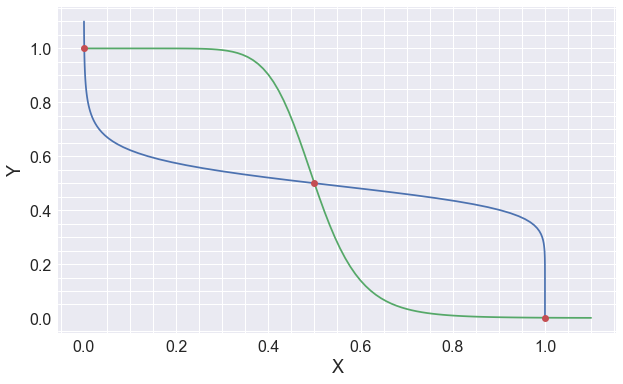

In [16]:
fig, ax1 = plt.subplots(figsize=(10,6))
yvals = np.linspace(0,1.1,100)
xvals = np.linspace(0,1.1,100)
X = hillfuncrep(yvals,K,n) #x = f(y)
Y = hillfuncrep(xvals,K,n) #y = f(x)
ax1.plot(X,yvals)
ax1.plot(xvals,Y)
ax1.plot(xst,yst,'o')
ax1.grid(which='both')
ax1.minorticks_on()
ax1.set_xlabel('X', fontsize=18)
ax1.set_ylabel('Y', fontsize=18)

Text(0,0.5,'Y')

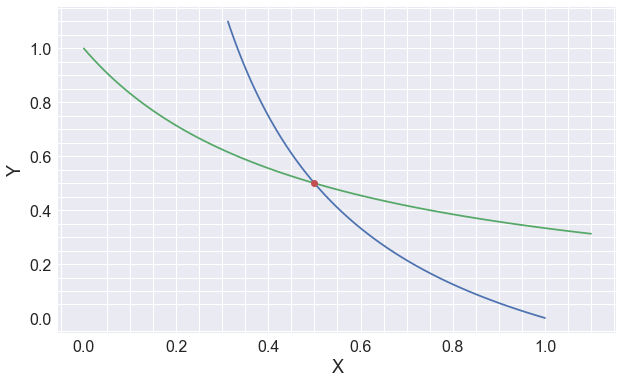

In [17]:
fig, ax1 = plt.subplots(figsize=(10,6))
yvals = np.linspace(0,1.1,100)
xvals = np.linspace(0,1.1,100)
X = hillfuncrep(yvals,K,1) #x = f(y)
Y = hillfuncrep(xvals,K,1) #y = f(x)
ax1.plot(X,yvals)
ax1.plot(xvals,Y)
ax1.plot(xst[1],yst[1],'o')
ax1.grid(which='both')
ax1.minorticks_on()
ax1.set_xlabel('X', fontsize=18)
ax1.set_ylabel('Y', fontsize=18)

**Simulate the dynamics of a toggle switch in response to a pulse of activation of a TF Z which represses one factor of the switch and activates the other. Which input function (AND or OR) do you need to make Z flip the switch from one steady state to the other? How short can the pulse be to flip the switch?**

In [ ]:
Simulate the dynamics of a toggle switch in response to a pulse of activation of a TF Z which represses one factor of the switch and activates the other. Which input function (AND or OR) do you need to make Z flip the switch from one steady state to the other? How short can the pulse be to flip the switch

In [18]:
def simpleregz(Z,t,B,a,D):
    if (t>=D[0] and t<=D[1]):
        dzdt = B - (a*Z)
    else:
        dzdt = -(a*Z)
    return dzdt

def reghillx(X,t,Y,Z,B,a,K,n):
    dxdt = ((B*hillfuncrep(Y,K,n)+(B*hillfuncact(Z,K,n))))-(a*X)+0.2
    return dxdt

def reghilly(Y,t,X,Z,B,a,K,n):
    dydt = (B*hillfuncrep(X,K,n)*(B*hillfuncrep(Z,K,n)))-(a*Y)+0.2
    return dydt

In [19]:
def rate_pulse(u,t,a,B,K,n,D):
    X,Y,Z = u
    dzdt = simpleregz(Z,t,B,a,D)
    dxdt = reghillx(X,t,Y,Z,B,a,K,n)
    dydt = reghilly(Y,t,X,Z,B,a,K,n)
    return [dxdt,dydt,dzdt]

In [20]:
D = [2,10]
B = 1
a = 1
K = 0.5
n = 20
t = np.linspace(0,20,50)
s = ((t>=D[0])&(t<=D[1]))
U = odeint(rate_pulse,[0.7,1,0],t,args=(a,B,K,n,D))

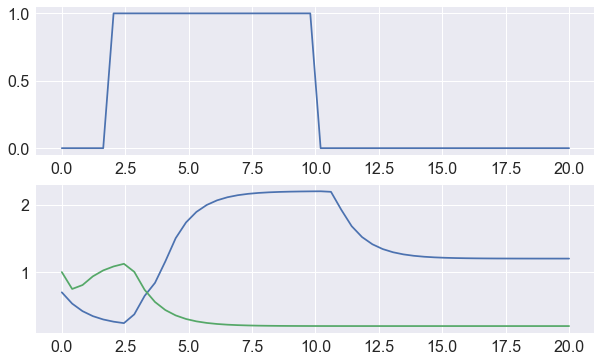

In [22]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))
ax1.plot(t,s)
ax2.plot(t,U[:,0])
ax2.plot(t,U[:,1])